In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('dadosacoes.csv', sep=',')

In [17]:
df

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975
...,...,...,...,...
95,SUZB3,208,78,3035
96,VALE3,253,60,3263
97,GOOGLE,99,35,980
98,VALE3,82,43,1866


<Axes: title={'center': 'Nome da ação x Preço da ação'}, xlabel='nome ação', ylabel='preço ação R$'>

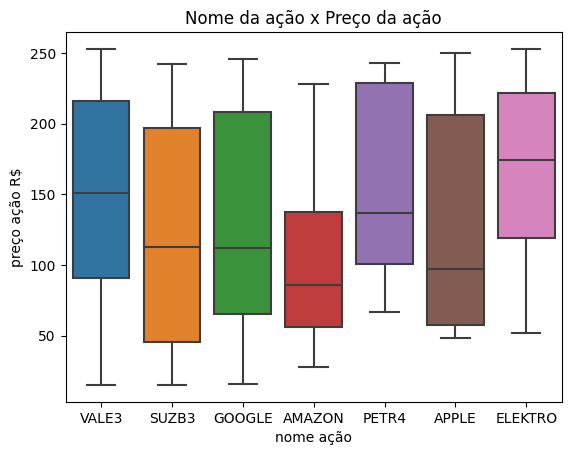

In [6]:
plt.title("Nome da ação x Preço da ação")
sns.boxplot(x=df['nome ação'], y=df['preço ação R$'])

<Axes: title={'center': 'Nome da ação x Valor de mercado'}, xlabel='nome ação', ylabel='valor de mercado R$ -(Bilhões)'>

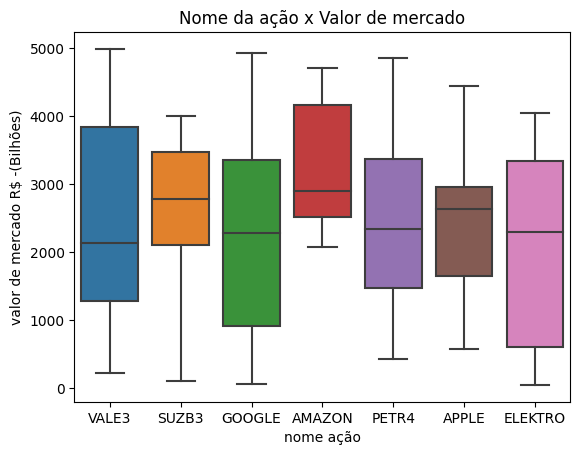

In [7]:
plt.title("Nome da ação x Valor de mercado")
sns.boxplot(x=df['nome ação'], y=df['valor de mercado R$ -(Bilhões)'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [14]:
df.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [19]:
df.isnull().sum()

nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64

In [21]:
dados = pd.get_dummies(df,columns=['nome ação'], drop_first=True)

In [22]:
dados

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),nome ação_APPLE,nome ação_ELEKTRO,nome ação_GOOGLE,nome ação_PETR4,nome ação_SUZB3,nome ação_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
95,208,78,3035,False,False,False,False,True,False
96,253,60,3263,False,False,False,False,False,True
97,99,35,980,False,False,True,False,False,False
98,82,43,1866,False,False,False,False,False,True


In [67]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dados)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [68]:
sse = kmeans.inertia_
print(sse)

13009667.052161172


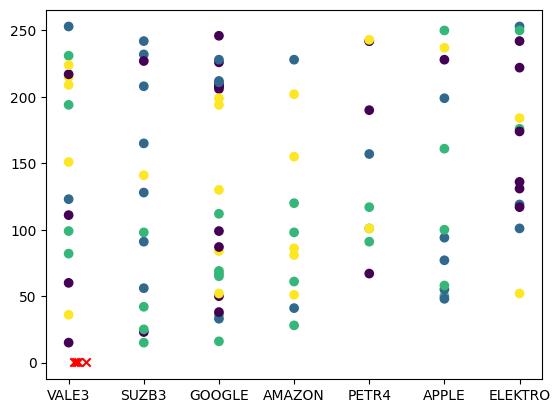

In [69]:

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df['nome ação'], df['preço ação R$'], c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x', color='red')

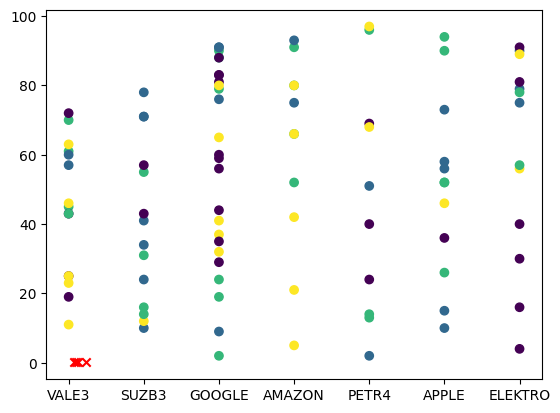

In [70]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df['nome ação'], df['qtde cotas'], c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x', color='red')

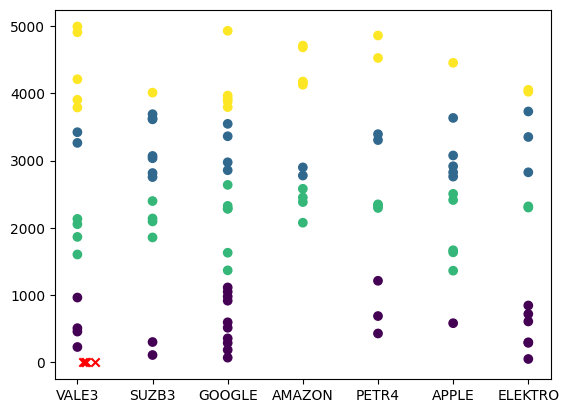

In [72]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df['nome ação'], df['valor de mercado R$ -(Bilhões)'], c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x', color='red')

In [73]:
features = dados[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(features)
dados['Cluster'] = kmeans.labels_

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


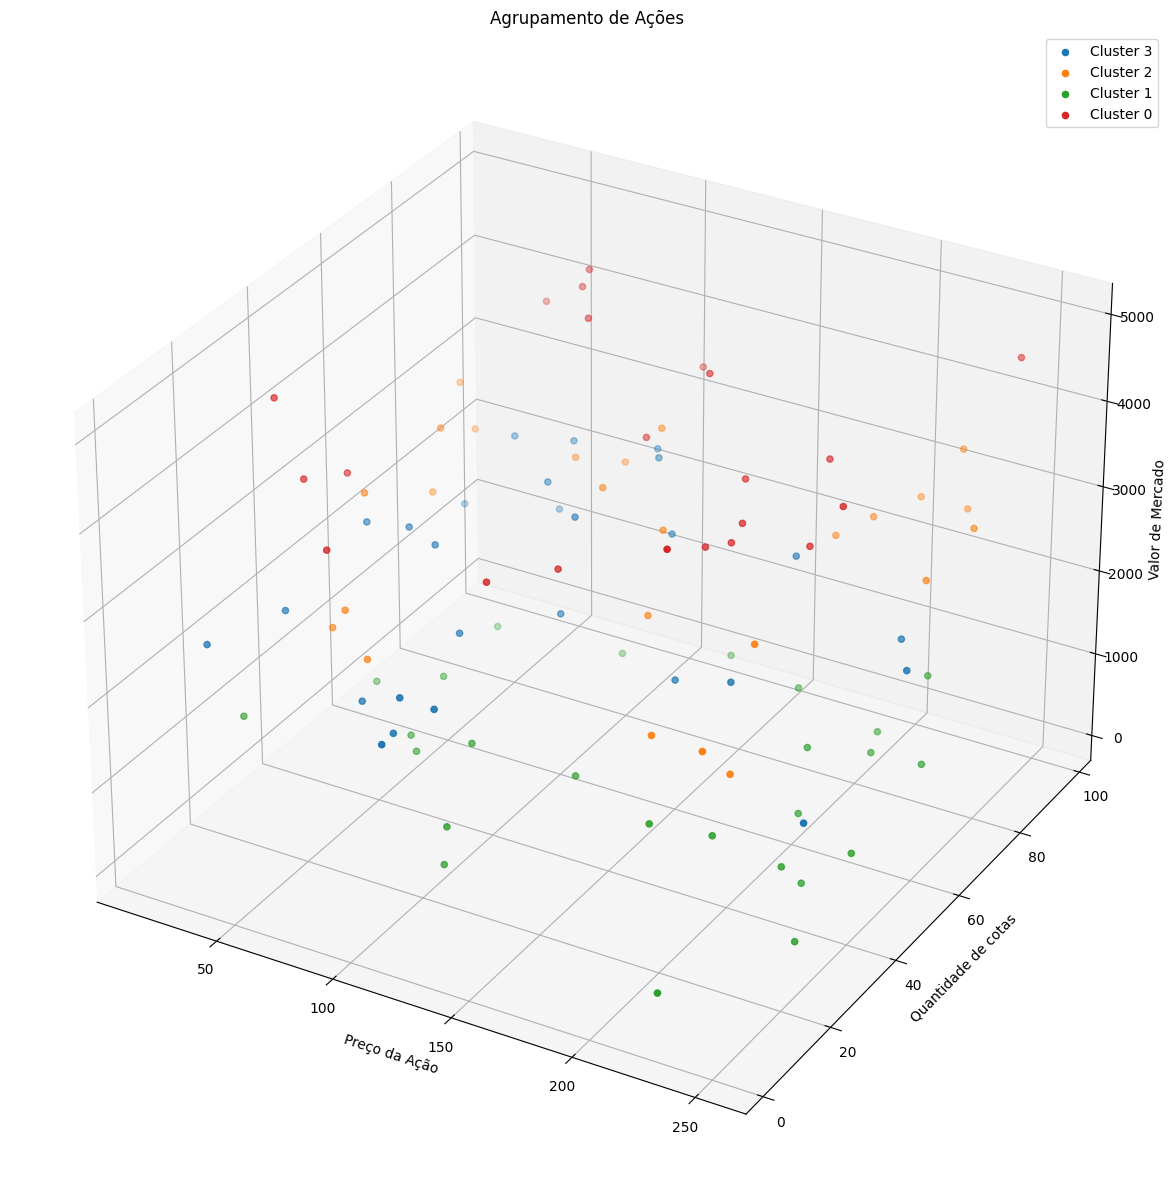

In [74]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

for cluster in dados['Cluster'].unique():
    cluster_data = dados[dados['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de cotas')
ax.set_zlabel('Valor de Mercado')
ax.set_title(f'Agrupamento de Ações')
plt.legend()
plt.show()

In [62]:
cluster_means = dados.groupby('Cluster').mean()
print(cluster_means)

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           143.000000   49.772727                     4263.636364   
1           153.038462   50.307692                      553.961538   
2           149.680000   52.760000                     3137.320000   
3           101.740741   54.777778                     2101.259259   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.045455           0.136364          0.227273   
1               0.038462           0.230769          0.384615   
2               0.200000           0.080000          0.200000   
3               0.185185           0.074074          0.185185   

         nome ação_PETR4  nome ação_SUZB3  nome ação_VALE3     Grupo  
Cluster                                                               
0               0.090909         0.045455     

In [79]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(dados)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [80]:
sse = kmeans.inertia_
print(sse)

8688577.638593074


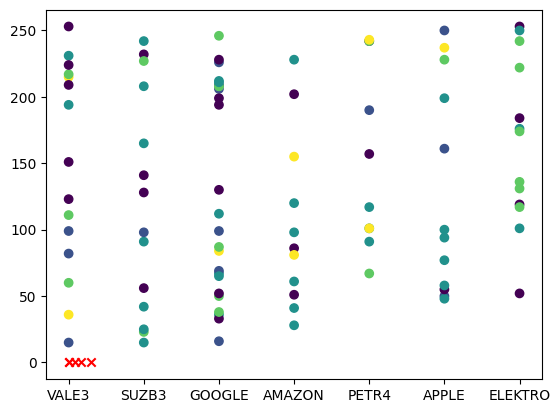

In [81]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df['nome ação'], df['preço ação R$'], c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x', color='red')

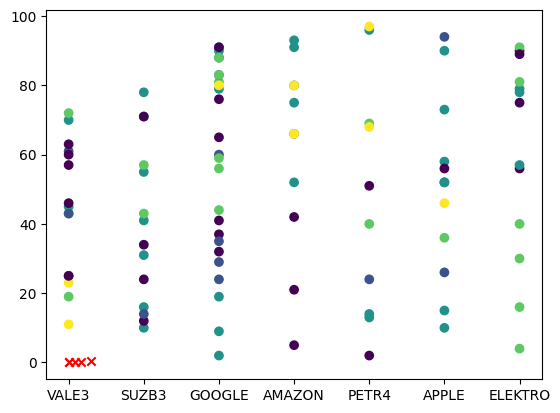

In [82]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df['nome ação'], df['qtde cotas'], c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x', color='red')

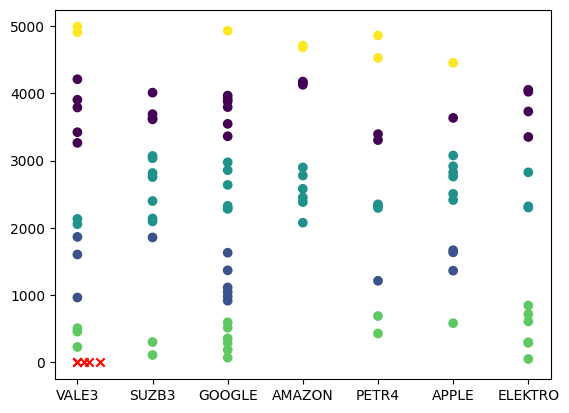

In [83]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df['nome ação'], df['valor de mercado R$ -(Bilhões)'], c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x', color='red')

In [84]:
features = dados[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=5, random_state=0).fit(features)
dados['Cluster'] = kmeans.labels_

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


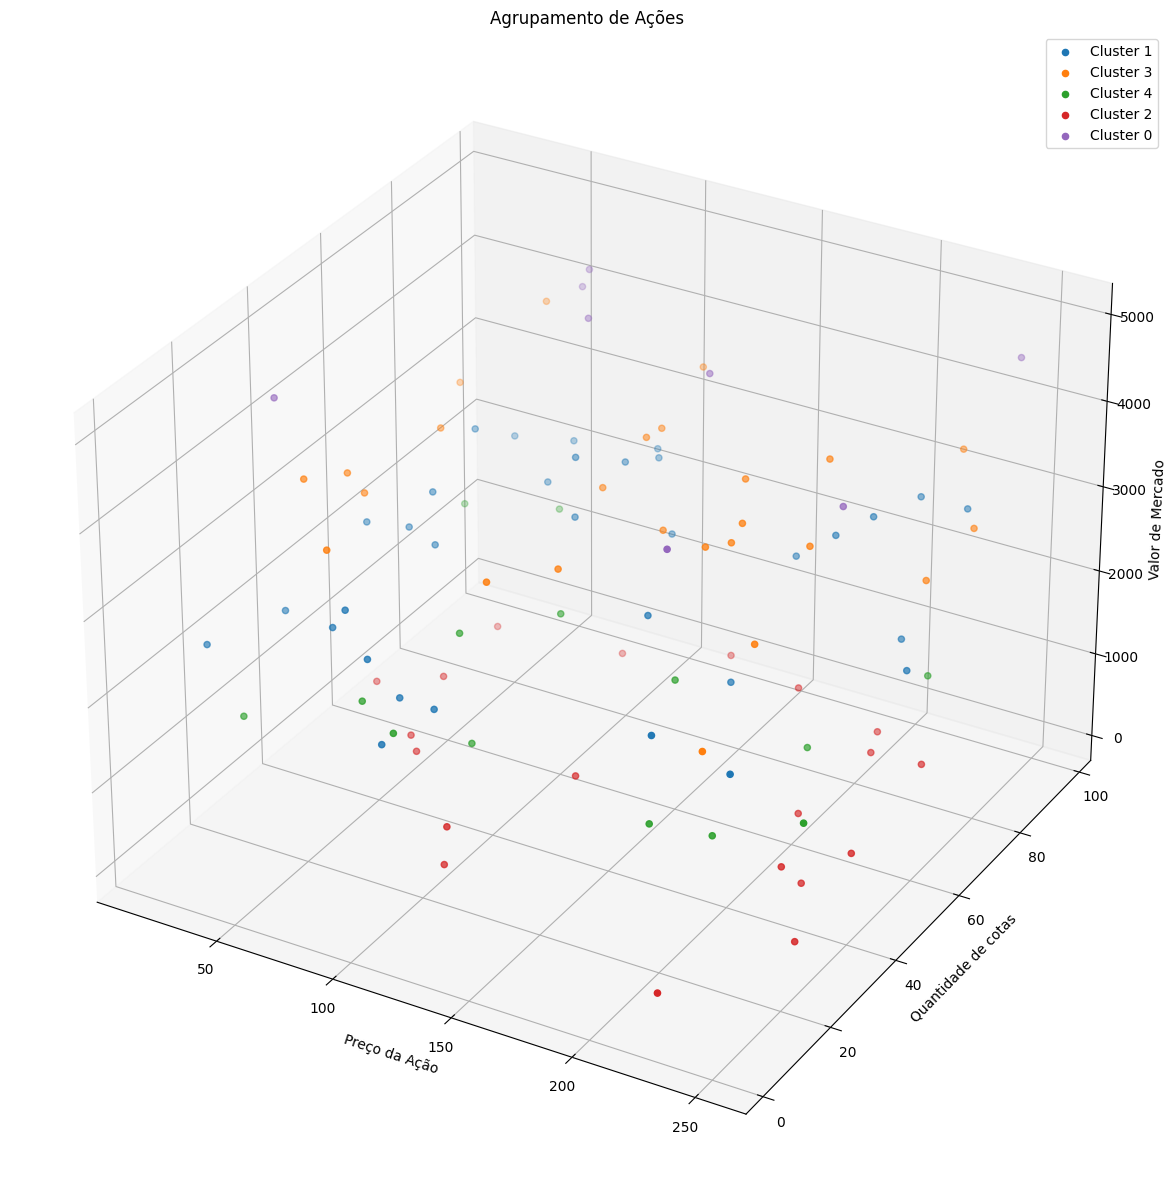

In [85]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

for cluster in dados['Cluster'].unique():
    cluster_data = dados[dados['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de cotas')
ax.set_zlabel('Valor de Mercado')
ax.set_title(f'Agrupamento de Ações')
plt.legend()
plt.show()

In [86]:
cluster_means = dados.groupby('Cluster').mean()
print(cluster_means)

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           144.000000   58.875000                     4757.250000   
1           118.303030   54.515152                     2544.333333   
2           151.700000   52.600000                      408.000000   
3           150.160000   48.840000                     3757.920000   
4           126.428571   47.000000                     1374.357143   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.125000           0.000000          0.125000   
1               0.181818           0.090909          0.181818   
2               0.050000           0.300000          0.300000   
3               0.040000           0.160000          0.240000   
4               0.214286           0.000000          0.428571   

         nome ação_PETR4  nome ação_SUZB3  nome ação_

In [90]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(dados)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans()

In [95]:
sse = kmeans.inertia_
print(sse)

3006872.5966944136


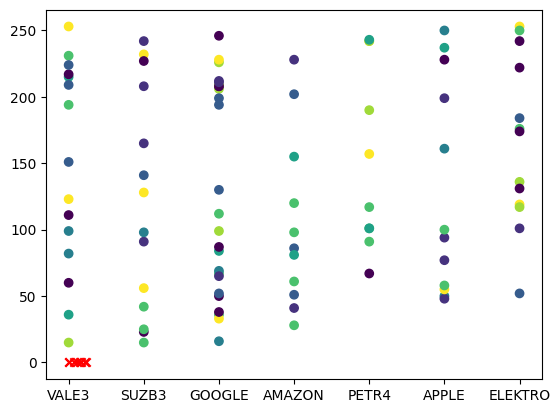

In [96]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df['nome ação'], df['preço ação R$'], c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x', color='red')

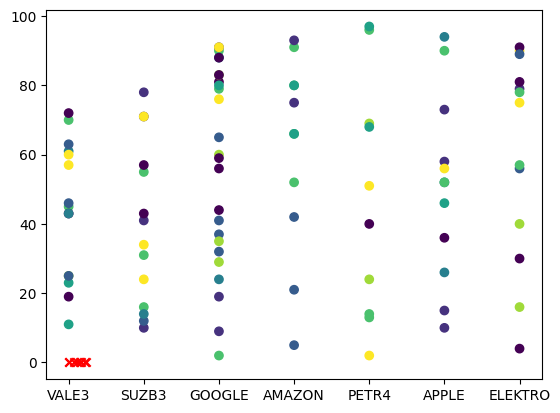

In [97]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df['nome ação'], df['qtde cotas'], c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x', color='red')

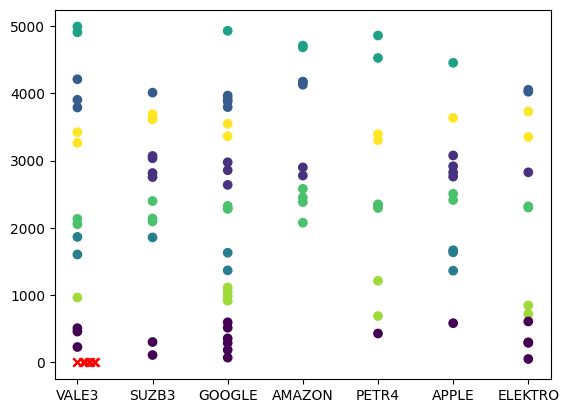

In [98]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(df['nome ação'], df['valor de mercado R$ -(Bilhões)'], c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x', color='red')

In [99]:
features = dados[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]
kmeans = KMeans(n_clusters=8, random_state=0).fit(features)
dados['Cluster'] = kmeans.labels_

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


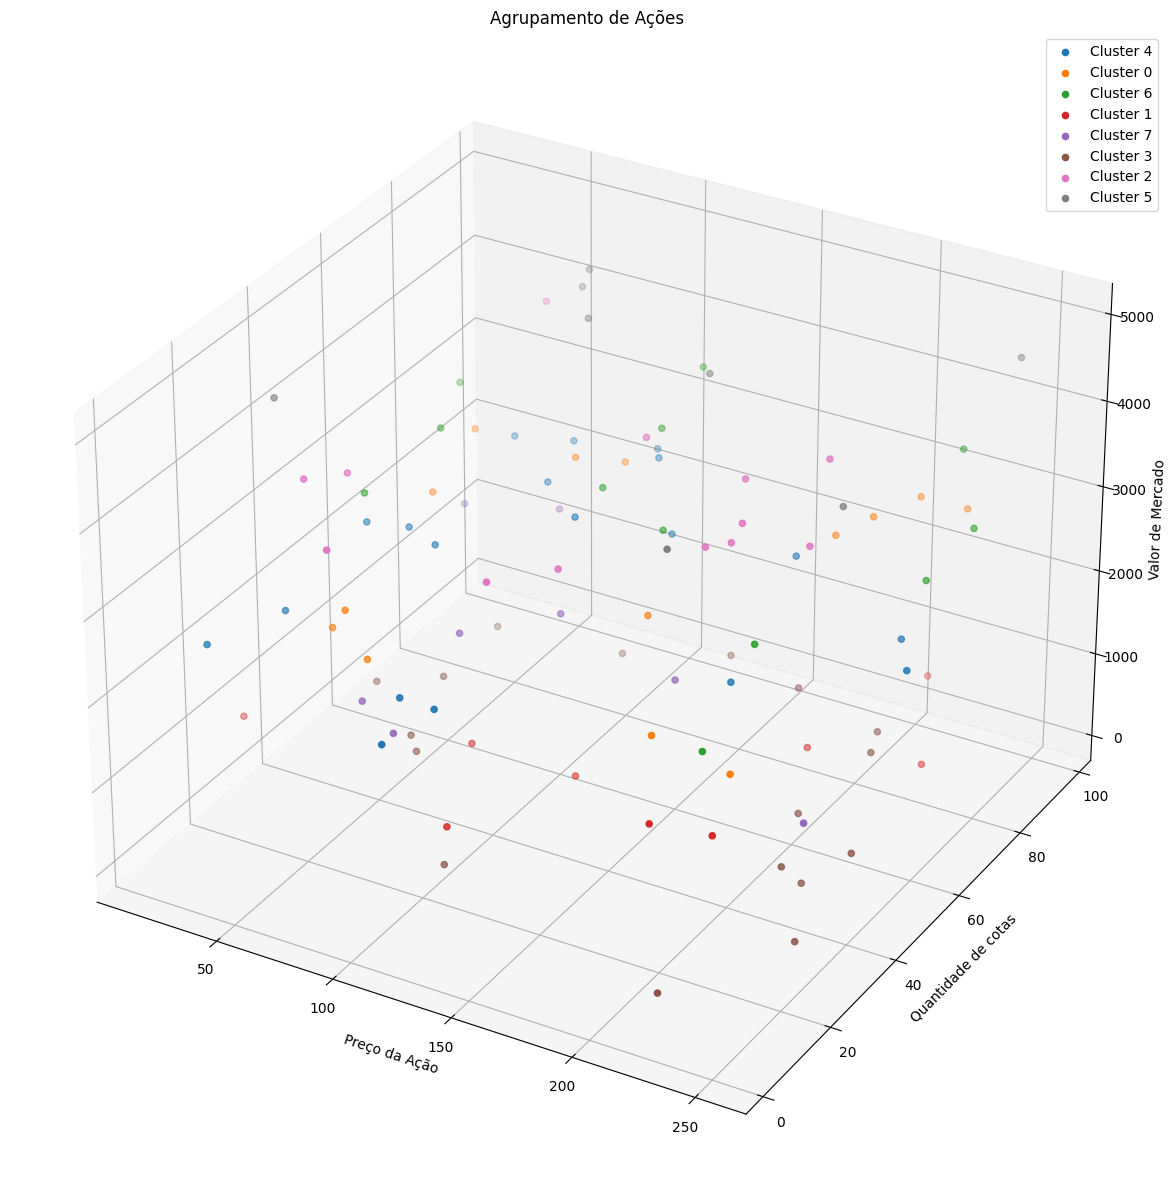

In [100]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

for cluster in dados['Cluster'].unique():
    cluster_data = dados[dados['Cluster'] == cluster]
    ax.scatter(cluster_data['preço ação R$'], cluster_data['qtde cotas'], cluster_data['valor de mercado R$ -(Bilhões)'], label=f'Cluster {cluster}')

ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Quantidade de cotas')
ax.set_zlabel('Valor de Mercado')
ax.set_title(f'Agrupamento de Ações')
plt.legend()
plt.show()

In [101]:
cluster_means = dados.groupby('Cluster').mean()
print(cluster_means)

         preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  \
Cluster                                                              
0           141.571429   51.571429                     2873.357143   
1           160.000000   42.333333                      944.444444   
2           144.230769   41.076923                     4000.923077   
3           149.352941   54.529412                      347.235294   
4           101.157895   56.684211                     2301.894737   
5           144.000000   58.875000                     4757.250000   
6           156.583333   57.250000                     3494.666667   
7           103.125000   50.250000                     1624.750000   

         nome ação_APPLE  nome ação_ELEKTRO  nome ação_GOOGLE  \
Cluster                                                         
0               0.285714           0.071429          0.214286   
1               0.000000           0.222222          0.444444   
2               0.000000           0.15

In [ ]:
# 5) Qual a maior vantagem do aprendizado não supervisionado diante o aprendizado supervisionado ?
# No aprendizado supervisionado nós precisamos dividir os dados em treino e teste, para treinar o nosso algoritmo, já no aprendizado não supervisionado nós não precisamos treinar o algoritmo, 
# ele por conta própria aprende com os dados e os agrupa com base nas suas caracteristicas semelhantes